#STEP 1 : Exploration

In [ ]:
#data connection
folderPath = '/content/drive/MyDrive/Colab Notebooks/Carerha/Data/Data Analysis Project - Practice'
#data readinf
import pandas as pd

df = pd.read_excel(folderPath + '/Sales.xlsx')
df.head()


,Date,Sub_Db_Name,Username,Name_Of_The_User,Outlet_Id,PRODUCT_CODE,Product Name,Quantity,Price_Per_Piece,Total Price
0,2020-01-01,DB 4,Rep0010,Amgad,81,96938,Detergent 120ml,48,19.84,952.32
1,2020-01-01,DB 4,Rep0010,Amgad,81,52554,Soap 125gm - Normal,7,8.33,58.31
2,2020-01-01,DB 4,Rep0010,Amgad,81,22134,Soap 125gm - Red,7,8.33,58.31
3,2020-01-01,DB 4,Rep0010,Amgad,81,75443,Soap 125gm - blue,7,8.33,58.31
4,2020-01-01,DB 4,Rep0010,Amgad,81,99185,Soap 125gm - yellow,7,8.33,58.31


#STEP 2: Reading the data

In [ ]:
import os

# Initialize a dictionary to store dataframes with file names as keys
dataframes = {}

# Loop through all files in the folder
for file_name in os.listdir(folderPath):
    file_path = os.path.join(folderPath, file_name)

    # Check if the file is a CSV or XLSX file
    if file_name.endswith('.csv'):
        dataframes[file_name] = pd.read_csv(file_path)
    elif file_name.endswith('.xlsx'):
      if file_name == 'Targets April 2021.xlsx':
        dataframes[file_name] = pd.read_excel(file_path, sheet_name='Targets')
      else:
        dataframes[file_name] = pd.read_excel(file_path)  # Reads the first sheet by default


In [ ]:
# Now `dataframes` contains a dictionary of DataFrames with file names as keys
dataframes.keys()

dict_keys(['Visits.xlsx', 'Products.csv', 'Outlets.csv', 'Warehouses.xlsx', 'Sales.xlsx', 'Reps List.xlsx', 'Targets April 2021.xlsx'])

In [ ]:
#renaming dfs for convieniece
sales = dataframes['Sales.xlsx']
products = dataframes['Products.csv']
outlets = dataframes['Outlets.csv']
warehouses = dataframes['Warehouses.xlsx'] #in employees
visits = dataframes['Visits.xlsx'] #
rep_list = dataframes['Reps List.xlsx'] # in employees
targets_april = dataframes['Targets April 2021.xlsx']

#STEP 3: Clean And Transform the data



###1==> add Employees info and targets in one df

In [ ]:
#renaming column for merging
rep_list.rename(columns={'Distributor': 'Warehouse Name'}, inplace=True)

In [ ]:
# creating a new df that cotains the employee and ware house info
Employees =pd.merge(warehouses, rep_list, on='Warehouse Name', how='outer')
Employees.drop(columns=['Region','Code','Role'],axis=1,inplace=True)
Employees.rename(columns={'ID': 'Employee ID'}, inplace=True)
Employees

,Warehouse Name,Employee ID,Name,Username,ZONE
0,DB 1,1,Mohamed Hussein,Rep0003,Delta
1,DB 1,11,Rep 13,Rep0013,Delta
2,DB 2,2,Thabet Ali,Rep0004,Delta
3,DB 3,3,Amgad Mohsen,Rep0005,Upper
4,DB 3,10,أمير,Rep0012,Upper
5,DB 3,12,Rep 14,Rep0014,Upper
6,DB 4,4,Baher,Rep0006,Delta
7,DB 4,8,Amgad,Rep0010,Delta
8,DB 5,5,Omar,Rep0007,Cairo/Giza
9,DB 6,6,Yasser,Rep0008,Delta


In [ ]:
#exploring targets sheet and reading it right
targets_april.drop(columns=['Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)
targets_april

,ID,Username,Name,ZONE,Distributor,Target,AC
0,1,Rep0003,Mohamed Hussein,Delta,DB 1,195000,130
1,2,Rep0004,Thabet Ali,Delta,DB 2,460000,120
2,3,Rep0005,Amgad Mohsen,Upper,DB 3,175000,110
3,4,Rep0006,Baher,Delta,DB 4,490000,190
4,5,Rep0007,Omar,Cairo/Giza,DB 5,350000,60
5,6,Rep0008,Yasser,Delta,DB 6,400000,200
6,7,Rep0009,Osama,Upper,DB 7,320000,175
7,8,Rep0010,Amgad,Delta,DB 4,330000,175
8,9,Rep0011,محمد احمد,Upper,DB 7,400000,175
9,10,Rep0012,أمير,Upper,DB 3,420000,175


In [ ]:
# creating a new df that adds target to the emplyee info
employees_target =pd.merge(Employees, targets_april, on='Username', how='outer')
employees_target.drop(columns=['Name_y','ZONE_y','ID','Distributor'],axis=1,inplace=True)
employees_target.rename(columns={'Name_x': 'Name','ZONE_x': 'Zone','AC':'Active Customers'}, inplace=True)
employees_target

,Warehouse Name,Employee ID,Name,Username,Zone,Target,Active Customers
0,DB 1,1,Mohamed Hussein,Rep0003,Delta,195000,130
1,DB 2,2,Thabet Ali,Rep0004,Delta,460000,120
2,DB 3,3,Amgad Mohsen,Rep0005,Upper,175000,110
3,DB 4,4,Baher,Rep0006,Delta,490000,190
4,DB 5,5,Omar,Rep0007,Cairo/Giza,350000,60
5,DB 6,6,Yasser,Rep0008,Delta,400000,200
6,DB 7,7,Osama,Rep0009,Upper,320000,175
7,DB 4,8,Amgad,Rep0010,Delta,330000,175
8,DB 7,9,محمد احمد,Rep0011,Upper,400000,175
9,DB 3,10,أمير,Rep0012,Upper,420000,175


In [ ]:
employees_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Warehouse Name    12 non-null     object
 1   Employee ID       12 non-null     int64 
 2   Name              12 non-null     object
 3   Username          12 non-null     object
 4   Zone              12 non-null     object
 5   Target            12 non-null     int64 
 6   Active Customers  12 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 800.0+ bytes


###2==> Explore products and outlets

In [ ]:
products.drop(columns=['Unnamed: 6','Unnamed: 7','29034','96938'],axis=1,inplace=True)
products.dropna(how='all',inplace=True)
products['Product ID']=products['Product ID'].astype(int).astype(str)
products['Product Code']=products['Product Code'].astype(int).astype(str)
products.rename(columns={'subcategory': 'Subcategory'}, inplace=True)
products

,Product ID,Product Code,Product Name,Category,Subcategory,Price
0,1,96938,Detergent 120ml,Detergent,Detergent 120ml,19.84
1,2,52554,Soap 125gm - Normal,Soap,BS 125,8.33
2,3,22134,Soap 125gm - Red,Soap,BS 125,8.33
3,4,75443,Soap 125gm - blue,Soap,BS 125,8.33
4,5,99185,Soap 125gm - yellow,Soap,BS 125,8.33
5,6,39671,Soap 165gm - Normal,Soap,BS 165,10.83
6,7,98761,Soap 165gm - Red,Soap,BS 165,10.83
7,8,78236,Soap 165gm - blue,Soap,BS 165,10.83
8,9,27977,Soap 165gm - yellow,Soap,BS 165,10.83
9,10,77397,Soap 60gm - Normal,Soap,BS 60,3.50


In [ ]:
outlets.drop(columns=['Employee_Name','Employee_Code','Outlet Type'],axis=1,inplace=True)
outlets[['Outlet_Type', 'Outlet_Class']] = outlets['Outlet Class'].str.split('-', expand=True)

# Drop the original 'Outlet Class' column if no longer needed
outlets.drop(columns=['Outlet Class'], inplace=True)

# Optional: Strip any whitespace from the new columns
outlets['Outlet_Type'] = outlets['Outlet_Type'].str.strip()
outlets['Outlet_Class'] = outlets['Outlet_Class'].str.strip()

outlets.rename(columns={'OutletId': 'Outlet ID','Outlet_Type':'Outlet Type','Outlet_Class':'Outlet Class'}, inplace=True)

outlets

,Outlet ID,Outlet Name,Warehouse Code,Warehouse Name,Outlet Type,Outlet Class
0,1,ابو السعود,12422,DB 3,تجزئه,بقالة
1,2,ابو العز,39145,DB 7,تجزئه,بقالة
2,3,ابو حسن السورى,14856,DB 1,تجزئه,بقالة
3,4,ابو خالد,14856,DB 1,تجزئه,بقالة
4,5,ابو وائل ماركت,12422,DB 3,تجزئه,بقالة
...,...,...,...,...,...,...
5161,5162,محمد,12422,DB 3,تجزئه,بقالة
5162,5163,منظفات طيبه,12422,DB 3,تجزئه,منظفات
5163,5164,هايبر الجمله,14856,DB 1,تجزئه,بقالة
5164,5165,الشهاب,99510,DB 4,تجزئه,بقالة


In [ ]:
pd.pivot_table(outlets,values='Outlet ID',index='Outlet Type',aggfunc='count')

,Outlet ID
Outlet Type,
تجزئه,4602
جمله غذائى,339
جمله منظفات,225


In [ ]:
warehouse_outlets = pd.pivot_table(outlets,values='Outlet ID',index='Warehouse Name',aggfunc='count',columns='Outlet Type')
warehouse_outlets

Outlet Type,تجزئه,جمله غذائى,جمله منظفات
Warehouse Name,,,
DB 1,780,62,36
DB 2,403,33,23
DB 3,1140,88,51
DB 4,765,39,43
DB 5,347,33,19
DB 6,375,33,18
DB 7,792,51,35


###3==> sales

In [ ]:
sales_before = sales.copy()
sales

,Date,Sub_Db_Name,Username,Name_Of_The_User,Outlet_Id,PRODUCT_CODE,Product Name,Quantity,Price_Per_Piece,Total Price
0,2020-01-01,DB 4,Rep0010,Amgad,81,96938,Detergent 120ml,48,19.84,952.32
1,2020-01-01,DB 4,Rep0010,Amgad,81,52554,Soap 125gm - Normal,7,8.33,58.31
2,2020-01-01,DB 4,Rep0010,Amgad,81,22134,Soap 125gm - Red,7,8.33,58.31
3,2020-01-01,DB 4,Rep0010,Amgad,81,75443,Soap 125gm - blue,7,8.33,58.31
4,2020-01-01,DB 4,Rep0010,Amgad,81,99185,Soap 125gm - yellow,7,8.33,58.31
...,...,...,...,...,...,...,...,...,...,...
219789,2020-09-30,DB 7,Rep0011,محمد احمد,933,27977,Soap 165gm - yellow,-7,10.83,-75.81
219790,2020-09-30,DB 1,Rep0003,Mohamed Hussein,202,44871,Soap 115gm - blue 4 pcs 4 EGP Discount,-60,31.33,-1879.80
219791,2020-09-30,DB 1,Rep0013,Rep 13,4964,84712,Soap 165gm - yellow 4 pcs 4 EGP Discount,-12,41.33,-495.96
219792,2020-09-30,DB 1,Rep0013,Rep 13,4964,44871,Soap 115gm - blue 4 pcs 4 EGP Discount,-60,31.33,-1879.80


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219794 entries, 0 to 219793
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              219794 non-null  datetime64[ns]
 1   Sub_Db_Name       219794 non-null  object        
 2   Username          219794 non-null  object        
 3   Name_Of_The_User  219794 non-null  object        
 4   Outlet_Id         219794 non-null  int64         
 5   PRODUCT_CODE      219794 non-null  int64         
 6   Product Name      219794 non-null  object        
 7   Quantity          219794 non-null  int64         
 8   Price_Per_Piece   219794 non-null  float64       
 9   Total Price       219794 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 16.8+ MB


In [ ]:
# Step 1: Convert 'PRODUCT_CODE' and 'Outlet_Id' columns to strings
sales['PRODUCT_CODE'] = sales['PRODUCT_CODE'].astype(str)
sales['Outlet_Id'] = sales['Outlet_Id'].astype(str)

# Step 2: Rename columns
sales.rename(columns={
    'Sub_Db_Name': 'Warehouse Name',
    'PRODUCT_CODE': 'Product Code',
    'OutletID':'Outlet ID'
}, inplace=True)

# Step 3: Drop unnecessary columns
sales.drop(columns=['Name_Of_The_User', 'Price_Per_Piece'], inplace=True)

# Step 4: Fix negative values in 'Quantity' and 'Total Price' columns
sales['Quantity'] = sales['Quantity'].abs()  # Take absolute value to remove negatives
sales['Total Price'] = sales['Total Price'].abs()

sales

,Date,Warehouse Name,Username,Outlet_Id,Product Code,Product Name,Quantity,Total Price
0,2020-01-01,DB 4,Rep0010,81,96938,Detergent 120ml,48,952.32
1,2020-01-01,DB 4,Rep0010,81,52554,Soap 125gm - Normal,7,58.31
2,2020-01-01,DB 4,Rep0010,81,22134,Soap 125gm - Red,7,58.31
3,2020-01-01,DB 4,Rep0010,81,75443,Soap 125gm - blue,7,58.31
4,2020-01-01,DB 4,Rep0010,81,99185,Soap 125gm - yellow,7,58.31
...,...,...,...,...,...,...,...,...
219789,2020-09-30,DB 7,Rep0011,933,27977,Soap 165gm - yellow,7,75.81
219790,2020-09-30,DB 1,Rep0003,202,44871,Soap 115gm - blue 4 pcs 4 EGP Discount,60,1879.80
219791,2020-09-30,DB 1,Rep0013,4964,84712,Soap 165gm - yellow 4 pcs 4 EGP Discount,12,495.96
219792,2020-09-30,DB 1,Rep0013,4964,44871,Soap 115gm - blue 4 pcs 4 EGP Discount,60,1879.80


In [ ]:

# Filter for April 2021
sales_april_2021 = sales[(sales['Date'] >= '2021-04-01') & (sales['Date'] <= '2021-04-30')]

sales_april_2021

,Date,Warehouse Name,Username,Outlet_Id,Product Code,Product Name,Quantity,Total Price
71238,2021-04-01,DB 4,Rep0010,3754,98761,Soap 165gm - Red,240,2599.20
71239,2021-04-01,DB 3,Rep0005,3522,27977,Soap 165gm - yellow,1,10.83
71240,2021-04-01,DB 3,Rep0005,3522,77397,Soap 60gm - Normal,6,21.00
71241,2021-04-01,DB 3,Rep0005,3522,91553,Soap 60gm - blue,6,21.00
71242,2021-04-01,DB 3,Rep0005,3971,27977,Soap 165gm - yellow,1,10.83
...,...,...,...,...,...,...,...,...
81161,2021-04-17,DB 6,Rep0008,4499,29213,Soap 165gm - blue 4 pcs 4 EGP Discount,1,41.33
81162,2021-04-17,DB 6,Rep0008,4499,52554,Soap 125gm - Normal,1,8.33
81163,2021-04-17,DB 6,Rep0008,4499,77397,Soap 60gm - Normal,12,42.00
81164,2021-04-17,DB 6,Rep0008,4499,91553,Soap 60gm - blue,6,21.00


In [ ]:
sales_april_2021.reset_index(drop=True,inplace=True)
sales_april_2021

,Date,Warehouse Name,Username,Outlet_Id,Product Code,Product Name,Quantity,Total Price
0,2021-04-01,DB 4,Rep0010,3754,98761,Soap 165gm - Red,240,2599.20
1,2021-04-01,DB 3,Rep0005,3522,27977,Soap 165gm - yellow,1,10.83
2,2021-04-01,DB 3,Rep0005,3522,77397,Soap 60gm - Normal,6,21.00
3,2021-04-01,DB 3,Rep0005,3522,91553,Soap 60gm - blue,6,21.00
4,2021-04-01,DB 3,Rep0005,3971,27977,Soap 165gm - yellow,1,10.83
...,...,...,...,...,...,...,...,...
9923,2021-04-17,DB 6,Rep0008,4499,29213,Soap 165gm - blue 4 pcs 4 EGP Discount,1,41.33
9924,2021-04-17,DB 6,Rep0008,4499,52554,Soap 125gm - Normal,1,8.33
9925,2021-04-17,DB 6,Rep0008,4499,77397,Soap 60gm - Normal,12,42.00
9926,2021-04-17,DB 6,Rep0008,4499,91553,Soap 60gm - blue,6,21.00


###4==> visits

In [ ]:
visits

,DB Name,Sales Rep ID,Sales Rep Name,Date,Classification,Store Code,Visit Starting Time,Visit Ending Time,Sale Amount
0,DB 3,3,Amgad Mohsen,2020-01-01,جمله,81,13:21:19,13:21:34,NaN
1,DB 3,3,Amgad Mohsen,2020-01-01,جمله,4514,13:22:47,13:28:21,NaN
2,DB 1,11,Rep 13,2020-01-01,جمله,3243,13:47:24,13:49:16,NaN
3,DB 1,1,Mohamed Hussein,2020-01-01,تجزئه,2269,14:42:43,14:45:59,NaN
4,DB 2,2,Thabet Ali,2020-01-01,جمله,4522,17:14:29,17:14:39,NaN
...,...,...,...,...,...,...,...,...,...
219643,DB 7,9,محمد احمد,2020-09-10,تجزئه,241,14:36:45,14:41:31,NaN
219644,DB 7,7,Osama,2020-09-10,تجزئه,3342,15:02:03,15:02:36,NaN
219645,DB 3,12,Rep 14,2020-09-10,تجزئه,2415,15:04:26,15:07:20,NaN
219646,DB 3,12,Rep 14,2020-09-10,تجزئه,4884,15:10:02,15:12:28,NaN


In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219648 entries, 0 to 219647
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DB Name              219648 non-null  object        
 1   Sales Rep ID         219648 non-null  int64         
 2   Sales Rep Name       219648 non-null  object        
 3   Date                 219648 non-null  datetime64[ns]
 4   Classification       219648 non-null  object        
 5   Store Code           219648 non-null  int64         
 6   Visit Starting Time  219648 non-null  object        
 7   Visit Ending Time    219648 non-null  object        
 8   Sale Amount          875 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 15.1+ MB


In [ ]:
#Type Casting

visits['Sales Rep ID'] = visits['Sales Rep ID'].astype(str)
visits['Store Code'] = visits['Store Code'].astype(str)
visits['Ending Time'] = pd.to_datetime(visits['Visit Ending Time'], errors='coerce',format='%H:%M:%S').dt.time
visits['Starting Time'] = pd.to_datetime(visits['Visit Starting Time'], errors='coerce',format='%H:%M:%S').dt.time

visits.drop(columns=['Sale Amount','Visit Ending Time','Visit Starting Time','Sales Rep Name'],axis=1,inplace=True)

visits.rename(columns={
    'Sales Rep ID': 'Employee ID',
    'Store Code': 'Outlet ID',
    'DB Name': 'Warehouse Name'
}, inplace=True)

visits


,Warehouse Name,Employee ID,Date,Classification,Outlet ID,Ending Time,Starting Time
0,DB 3,3,2020-01-01,جمله,81,13:21:34,13:21:19
1,DB 3,3,2020-01-01,جمله,4514,13:28:21,13:22:47
2,DB 1,11,2020-01-01,جمله,3243,13:49:16,13:47:24
3,DB 1,1,2020-01-01,تجزئه,2269,14:45:59,14:42:43
4,DB 2,2,2020-01-01,جمله,4522,17:14:39,17:14:29
...,...,...,...,...,...,...,...
219643,DB 7,9,2020-09-10,تجزئه,241,14:41:31,14:36:45
219644,DB 7,7,2020-09-10,تجزئه,3342,15:02:36,15:02:03
219645,DB 3,12,2020-09-10,تجزئه,2415,15:07:20,15:04:26
219646,DB 3,12,2020-09-10,تجزئه,4884,15:12:28,15:10:02


In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219648 entries, 0 to 219647
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Warehouse Name  219648 non-null  object        
 1   Employee ID     219648 non-null  object        
 2   Date            219648 non-null  datetime64[ns]
 3   Classification  219648 non-null  object        
 4   Outlet ID       219648 non-null  object        
 5   Ending Time     219648 non-null  object        
 6   Starting Time   219648 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 11.7+ MB


#STEP 4: Saving clean data in new folder

In [ ]:
import os

# Define the folder path where the CSVs will be saved
folder_path = '/content/drive/MyDrive/Colab Notebooks/Carerha/output_data'

# Create the folder if it does not exist
os.makedirs(folder_path, exist_ok=True)

# List of DataFrames to save
dataframes = [employees_target, products, outlets, sales, visits, sales_april_2021]
file_names = ['employees_target.csv', 'products.csv', 'outlets.csv', 'sales.csv', 'visits.csv', 'sales_april_2021.csv']

# Loop through the DataFrames and save each as a CSV
for df, file_name in zip(dataframes, file_names):
    file_path = os.path.join(folder_path, file_name)
    df.to_csv(file_path, index=False)

print(f"DataFrames saved to '{folder_path}' as CSV files.")


DataFrames saved to '/content/drive/MyDrive/Colab Notebooks/Carerha/output_data' as CSV files.


#STEP 5: Data Analysis

##Read The data and Exlore it

In [ ]:
######Read clean data######
import os
import pandas as pd

folderPath = '/content/drive/MyDrive/Colab Notebooks/Carerha/output_data'

dfs = {}

# Loop through all files in the folder
for file_name in os.listdir(folderPath):
    file_path = os.path.join(folderPath, file_name)
    dfs[file_name] = pd.read_csv(file_path)


In [ ]:
dfs.keys()

dict_keys(['employees_target.csv', 'products.csv', 'outlets.csv', 'sales.csv', 'visits.csv', 'sales_april_2021.csv'])

In [ ]:
# Loop through the dictionary and print the .info() of each DataFrame
for file_name, df in dfs.items():
    print(f"Info for {file_name}:")
    df.info()
    print("\n" + "-" * 50 + "\n")  # Separate output for readability

Info for employees_target.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Warehouse Name    12 non-null     object
 1   Employee ID       12 non-null     int64 
 2   Name              12 non-null     object
 3   Username          12 non-null     object
 4   Zone              12 non-null     object
 5   Target            12 non-null     int64 
 6   Active Customers  12 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 800.0+ bytes

--------------------------------------------------

Info for products.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    50 non-null     int64  
 1   Product Code  50 non-null     int64  
 2   Product Name  50 non-null     object 
 3   

##Start to Analyse

In [ ]:
########sales##########
dfs['sales_april_2021.csv']

,Date,Warehouse Name,Username,Outlet_Id,Product Code,Product Name,Quantity,Total Price
0,2021-04-01,DB 4,Rep0010,3754,98761,Soap 165gm - Red,240,2599.20
1,2021-04-01,DB 3,Rep0005,3522,27977,Soap 165gm - yellow,1,10.83
2,2021-04-01,DB 3,Rep0005,3522,77397,Soap 60gm - Normal,6,21.00
3,2021-04-01,DB 3,Rep0005,3522,91553,Soap 60gm - blue,6,21.00
4,2021-04-01,DB 3,Rep0005,3971,27977,Soap 165gm - yellow,1,10.83
...,...,...,...,...,...,...,...,...
9923,2021-04-17,DB 6,Rep0008,4499,29213,Soap 165gm - blue 4 pcs 4 EGP Discount,1,41.33
9924,2021-04-17,DB 6,Rep0008,4499,52554,Soap 125gm - Normal,1,8.33
9925,2021-04-17,DB 6,Rep0008,4499,77397,Soap 60gm - Normal,12,42.00
9926,2021-04-17,DB 6,Rep0008,4499,91553,Soap 60gm - blue,6,21.00


In [ ]:
#Calculate the achieved for april
emp_achieved = pd.pivot_table(dfs['sales_april_2021.csv'],values='Total Price',index='Username',aggfunc='sum')

In [ ]:
#acheved VS targeted of april
april_empl = pd.merge(dfs['employees_target.csv'][['Username','Name','Target']],emp_achieved,on='Username',how='inner')
april_empl.rename(columns={'Total Price':'Achieved'}, inplace=True)
# Calculate the performance percentage
april_empl['Performance (%)'] = (april_empl['Achieved'] / april_empl['Target']) * 100


april_empl

,Username,Name,Target,Achieved,Performance (%)
0,Rep0003,Mohamed Hussein,195000,1603653.73,822.386528
1,Rep0004,Thabet Ali,460000,602719.38,131.025952
2,Rep0005,Amgad Mohsen,175000,425102.71,242.915834
3,Rep0006,Baher,490000,884008.01,180.409798
4,Rep0007,Omar,350000,274999.91,78.571403
5,Rep0008,Yasser,400000,417487.25,104.371813
6,Rep0009,Osama,320000,750954.80,234.673375
7,Rep0010,Amgad,330000,817140.26,247.618261
8,Rep0011,محمد احمد,400000,344263.65,86.065913
9,Rep0012,أمير,420000,659260.57,156.966802


In [ ]:
# Identify the top performer
top_performer = april_empl.loc[april_empl['Performance (%)'].idxmax()]
print("Top Performer:")
print(top_performer)

Top Performer:
Username                   Rep0003
Name               Mohamed Hussein
Target                      195000
Achieved                1603653.73
Performance (%)         822.386528
Name: 0, dtype: object


In [ ]:
april_empl.describe()

,Target,Achieved,Performance (%)
count,12.000000,1.200000e+01,12.000000
mean,318333.333333,6.611121e+05,260.557281
std,125740.232466,3.550256e+05,217.492262
min,130000.000000,2.749999e+05,78.571403
25%,190000.000000,4.231988e+05,124.362417
50%,340000.000000,6.309900e+05,207.541586
75%,405000.000000,7.675012e+05,260.174724
max,490000.000000,1.603654e+06,822.386528


In [ ]:
#calculating which warehouse had the highest sales
dfs['sales_april_2021.csv'].rename(columns={'Total Price':'Achieved'}, inplace=True)

warehouse_sales = dfs['sales_april_2021.csv'].groupby('Warehouse Name')['Achieved'].sum()

In [ ]:
#warehouse_sales=warehouse_sales.sort_values(by='Total Price',ascending=False)
warehouse_sales

,Achieved
Warehouse Name,
DB 1,2050419.90
DB 2,602719.38
DB 3,1791352.13
DB 4,1701148.27
DB 5,274999.91
DB 6,417487.25
DB 7,1095218.45


In [ ]:
dfs['visits.csv']

,Warehouse Name,Employee ID,Date,Classification,Outlet ID,Ending Time,Starting Time
0,DB 3,3,2020-01-01,جمله,81,13:21:34,13:21:19
1,DB 3,3,2020-01-01,جمله,4514,13:28:21,13:22:47
2,DB 1,11,2020-01-01,جمله,3243,13:49:16,13:47:24
3,DB 1,1,2020-01-01,تجزئه,2269,14:45:59,14:42:43
4,DB 2,2,2020-01-01,جمله,4522,17:14:39,17:14:29
...,...,...,...,...,...,...,...
219643,DB 7,9,2020-09-10,تجزئه,241,14:41:31,14:36:45
219644,DB 7,7,2020-09-10,تجزئه,3342,15:02:36,15:02:03
219645,DB 3,12,2020-09-10,تجزئه,2415,15:07:20,15:04:26
219646,DB 3,12,2020-09-10,تجزئه,4884,15:12:28,15:10:02


In [ ]:
#joining sales and visits to correcalte thier relationship
visits_rate = dfs['visits.csv'].groupby('Warehouse Name')['Employee ID'].count()
visits_rate = visits_rate.to_frame(name='Visits')
visits_rate.sort_values(by='Visits',ascending=False,inplace=True)
visits_rate

,Visits
Warehouse Name,
DB 3,54798
DB 7,36956
DB 4,36776
DB 1,36481
DB 5,18266
DB 6,18199
DB 2,18172


In [ ]:
dfs['employees_target.csv']

,Warehouse Name,Employee ID,Name,Username,Zone,Target,Active Customers
0,DB 1,1,Mohamed Hussein,Rep0003,Delta,195000,130
1,DB 2,2,Thabet Ali,Rep0004,Delta,460000,120
2,DB 3,3,Amgad Mohsen,Rep0005,Upper,175000,110
3,DB 4,4,Baher,Rep0006,Delta,490000,190
4,DB 5,5,Omar,Rep0007,Cairo/Giza,350000,60
5,DB 6,6,Yasser,Rep0008,Delta,400000,200
6,DB 7,7,Osama,Rep0009,Upper,320000,175
7,DB 4,8,Amgad,Rep0010,Delta,330000,175
8,DB 7,9,محمد احمد,Rep0011,Upper,400000,175
9,DB 3,10,أمير,Rep0012,Upper,420000,175


In [ ]:
visits_rate_employees = pd.merge(visits_rate, dfs['employees_target.csv'][['Warehouse Name','Employee ID','Name']], on='Warehouse Name', how='left')
visits_rate_employees.drop(columns=['Warehouse Name'],axis=1,inplace=True)
visits_rate_employees

,Visits,Employee ID,Name
0,54798,3,Amgad Mohsen
1,54798,10,أمير
2,54798,12,Rep 14
3,36956,7,Osama
4,36956,9,محمد احمد
5,36776,4,Baher
6,36776,8,Amgad
7,36481,1,Mohamed Hussein
8,36481,11,Rep 13
9,18266,5,Omar


In [ ]:
#analyzing the outlets sales
dfs['sales_april_2021.csv'].rename(columns={'Outlet_Id':'Outlet ID'}, inplace=True)
outlet_sales = pd.merge(dfs['sales_april_2021.csv'], dfs['outlets.csv'], on='Outlet ID', how='left')
outlet_sales.dropna(how='all',inplace=True)
outlet_sales.drop(columns=['Warehouse Name_y','Warehouse Code'],axis=1,inplace=True)
outlet_sales.rename(columns={'Warehouse Name_x': 'Warehouse Name'}, inplace=True)
outlet_sales

,Date,Warehouse Name,Username,Outlet ID,Product Code,Product Name,Quantity,Achieved,Outlet Name,Outlet Type,Outlet Class
0,2021-04-01,DB 4,Rep0010,3754,98761,Soap 165gm - Red,240,2599.20,مو صلاح,تجزئه,بقالة
1,2021-04-01,DB 3,Rep0005,3522,27977,Soap 165gm - yellow,1,10.83,اوركيدا,تجزئه,منظفات
2,2021-04-01,DB 3,Rep0005,3522,77397,Soap 60gm - Normal,6,21.00,اوركيدا,تجزئه,منظفات
3,2021-04-01,DB 3,Rep0005,3522,91553,Soap 60gm - blue,6,21.00,اوركيدا,تجزئه,منظفات
4,2021-04-01,DB 3,Rep0005,3971,27977,Soap 165gm - yellow,1,10.83,بام,تجزئه,بقالة
...,...,...,...,...,...,...,...,...,...,...,...
9923,2021-04-17,DB 6,Rep0008,4499,29213,Soap 165gm - blue 4 pcs 4 EGP Discount,1,41.33,عباد الرحمن,تجزئه,بقالة
9924,2021-04-17,DB 6,Rep0008,4499,52554,Soap 125gm - Normal,1,8.33,عباد الرحمن,تجزئه,بقالة
9925,2021-04-17,DB 6,Rep0008,4499,77397,Soap 60gm - Normal,12,42.00,عباد الرحمن,تجزئه,بقالة
9926,2021-04-17,DB 6,Rep0008,4499,91553,Soap 60gm - blue,6,21.00,عباد الرحمن,تجزئه,بقالة


In [ ]:
outlet_type_sales = pd.pivot_table(outlet_sales,values='Achieved',index='Outlet Type',aggfunc='sum')
outlet_type_sales

,Achieved
Outlet Type,
تجزئه,7252545.33
جمله غذائى,299185.15
جمله منظفات,381614.81


In [ ]:
outlet_class_sales = pd.pivot_table(outlet_sales,values='Achieved',index='Outlet Class',aggfunc='sum')
outlet_class_sales

,Achieved
Outlet Class,
بقالة,4165146.14
منظفات,3087399.19


In [ ]:
pd.pivot_table(outlet_sales,values='Achieved',index='Outlet Type',columns='Outlet Class',aggfunc='sum')

Outlet Class,بقالة,منظفات
Outlet Type,,
تجزئه,4165146.14,3087399.19


In [ ]:
warehouse_outlet_types = pd.pivot_table(outlet_sales,values='Outlet ID',index='Warehouse Name',aggfunc='count',columns='Outlet Type')
warehouse_outlet_types

Outlet Type,تجزئه,جمله غذائى,جمله منظفات
Warehouse Name,,,
DB 1,1665,95,105
DB 2,786,78,71
DB 3,2105,118,121
DB 4,1599,54,89
DB 5,601,53,22
DB 6,769,62,21
DB 7,1380,77,57


In [ ]:
product_sales = pd.pivot_table(outlet_sales,values='Quantity',index='Product Name',aggfunc='sum')
product_sales

,Quantity
Product Name,
Detergent 120ml,14215
Detergent 1L,7
Detergent 1L discounted 10%,20463
Detergent 235ml,1600
Detergent 245ml,4410
Detergent 500ml,24
Detergent 500ml 2 pcs with 50% discount,386
Detergent 500ml discounted 10%,10750
Detergent 50ml,22696


#STEP 6: Data Visualization

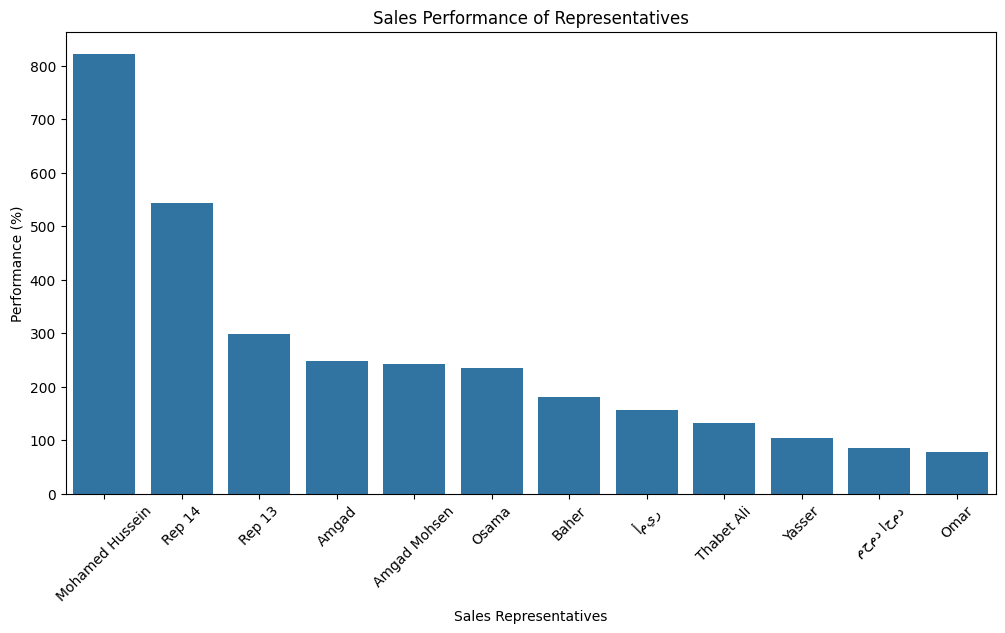

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
#sns.set(style="whitegrid")

# Create a bar plot for performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Performance (%)', data=april_empl.sort_values(by='Performance (%)', ascending=False))
plt.title('Sales Performance of Representatives')
plt.xticks(rotation=45)
plt.ylabel('Performance (%)')
plt.xlabel('Sales Representatives')
plt.show()


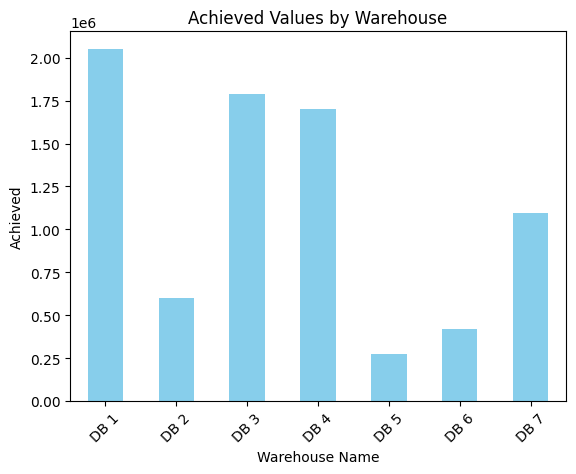

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
warehouse_sales.plot(kind='bar', x='Warehouse Name', y='Achieved', color='skyblue', legend=False)
plt.ylabel("Achieved")
plt.title("Achieved Values by Warehouse")
plt.xticks(rotation=45)
plt.show()


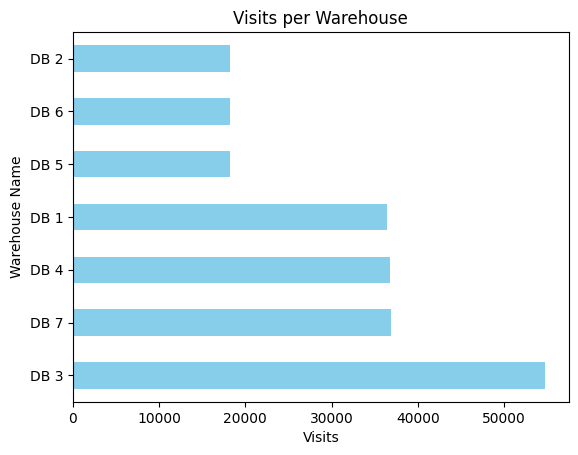

In [ ]:
import matplotlib.pyplot as plt

# Plotting horizontal bar chart
visits_rate.plot(kind='barh', color='skyblue', legend=False)
plt.xlabel("Visits")
plt.title("Visits per Warehouse")
plt.show()


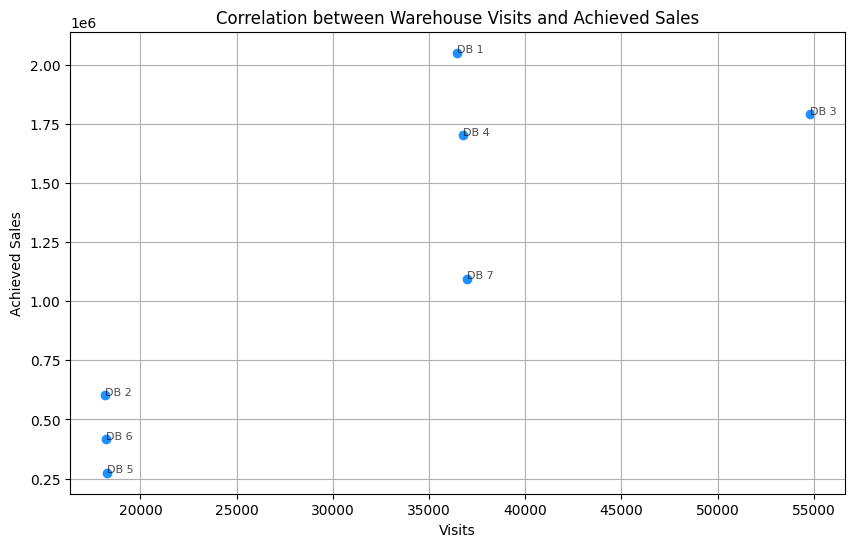

In [ ]:
#correlating visits wate with warehouse sales
# Resetting index for both to enable merging
warehouse_sales = warehouse_sales.reset_index()
visits_rate = visits_rate.reset_index()

# Merging on 'Warehouse Name'
merged_data = pd.merge(warehouse_sales, visits_rate, on='Warehouse Name')

# Scatter plot to visualize correlation
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Visits'], merged_data['Achieved'], color='dodgerblue')
plt.xlabel("Visits")
plt.ylabel("Achieved Sales")
plt.title("Correlation between Warehouse Visits and Achieved Sales")
plt.grid(True)

# Adding labels to the points
for i, txt in enumerate(merged_data['Warehouse Name']):
    plt.annotate(txt, (merged_data['Visits'][i], merged_data['Achieved'][i]), fontsize=8, alpha=0.7)

plt.show()

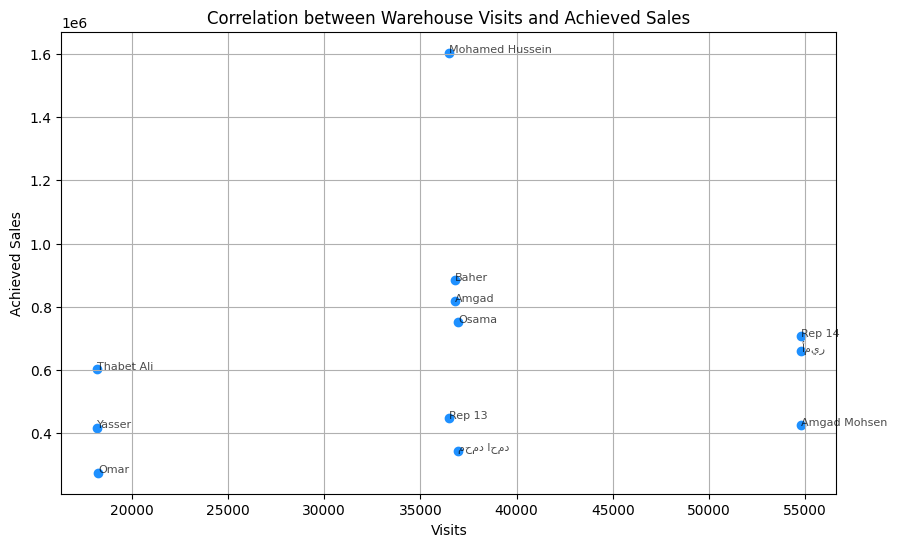

In [ ]:
#correlating visits wate with warehouse sales
# Resetting index for both to enable merging
april_empl = april_empl.reset_index()
visits_rate_employees = visits_rate_employees.reset_index()

# Merging on 'Warehouse Name'
merged_data = pd.merge(april_empl, visits_rate_employees, on='Name')

# Scatter plot to visualize correlation
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Visits'], merged_data['Achieved'], color='dodgerblue')
plt.xlabel("Visits")
plt.ylabel("Achieved Sales")
plt.title("Correlation between Warehouse Visits and Achieved Sales")
plt.grid(True)

# Adding labels to the points
for i, txt in enumerate(merged_data['Name']):
    plt.annotate(txt, (merged_data['Visits'][i], merged_data['Achieved'][i]), fontsize=8, alpha=0.7)

plt.show()

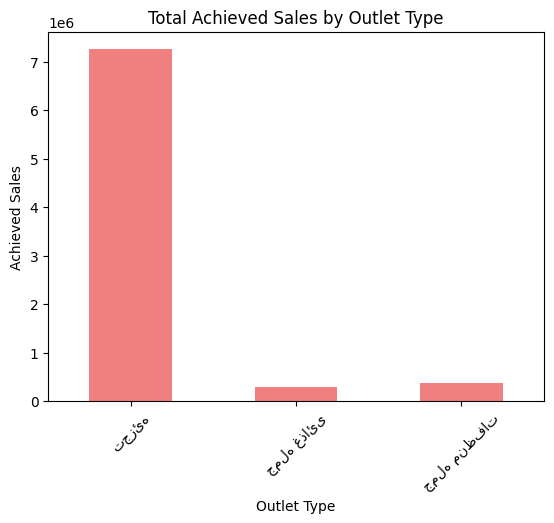

In [ ]:
import matplotlib.pyplot as plt

# Assuming outlet_type_sales is a DataFrame with Outlet Type as the index
outlet_type_sales.plot(kind='bar', color='lightcoral', legend=False)
plt.ylabel("Achieved Sales")
plt.title("Total Achieved Sales by Outlet Type")
plt.xticks(rotation=45)
plt.show()


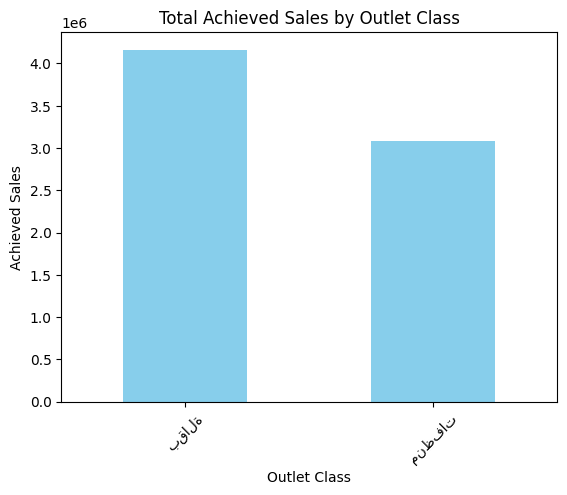

In [ ]:
# Assuming outlet_class_sales is a DataFrame with Outlet Class as the index
outlet_class_sales.plot(kind='bar', color='skyblue', legend=False)
plt.ylabel("Achieved Sales")
plt.title("Total Achieved Sales by Outlet Class")
plt.xticks(rotation=45)
plt.show()


#STEP 7: Business Insights


*assuming that negatives in quantity and total price are errors*
1.   Most employees achieved more than 100% of April Targets whcih means KPIs need to be revised
2.   Warehouse with the highest sales is DB1
3.   Number of Visits didn't affect the sales rate niether for warehouses nor employees
4.   sales foe 'تجزئه' are much higher than 'جملة'


